### Analysis of Sensor generated Health Data

- Wide use of smart phone creates huge amount of sensor health data every day
- We can monitor human activity and give advice on daily workout and nutrition plan.
- Here, we are going to analyze sensor data of human activity collected from various people (called subject)

In [ ]:
import pandas as pd

# To do linear algebra
import numpy as np
from numpy import pi

# To create plots
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
# To create nicer plots
import seaborn as sns

# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# To get new datatypes and functions
from collections import Counter
from cycler import cycler

from scipy.stats import norm,skew, probplot
from scipy.optimize import curve_fit

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from lightgbm import LGBMClassifier

from time import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
#import scikitplot as skplt
import itertools
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load dataset
train_df = pd.read_csv('sensor_activity_train.csv')
test_df = pd.read_csv('sensor_activity_test.csv')

train_df['Data'] = 'Train'
test_df['Data'] = 'Test'

df_sensor_activity = pd.concat([train_df,test_df], axis = 0).reset_index(drop = True)


#### Volume of data

In [ ]:
df_sensor_activity.shape

(10299, 564)

#### Statistical distribution of numeric data 

#### Analysis of columns

In [ ]:
df_sensor_activity.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'Data'],
      dtype='object', length=564)

#### Data understanding

In [ ]:
df_sensor_activity.tail(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS,Test
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS,Test
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS,Test
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS,Test
10298,0.153627,-0.018437,-0.137018,-0.330046,-0.195253,-0.164339,-0.430974,-0.218295,-0.229933,-0.111527,...,0.598808,-0.287951,0.876030,-0.024965,-0.660080,0.263936,0.188103,24,WALKING_UPSTAIRS,Test


#### Data from different Health monitoring devices for various persons(subject) are collected here

#### The subjects are showing the device data from various activities

#### Below is the count of records captured from each subject across activities using various devices

In [ ]:
df_sensor_activity['subject'].value_counts().sort_values(ascending=False)

25    409
21    408
26    392
30    383
28    382
24    381
27    376
23    372
17    368
16    366
18    364
19    360
20    354
1     347
29    344
3     341
15    328
13    327
6     325
14    323
22    321
12    320
4     317
11    316
7     308
5     302
2     302
10    294
9     288
8     281
Name: subject, dtype: int64

In [ ]:
df_sensor_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 564 entries, tBodyAcc-mean()-X to Data
dtypes: float64(561), int64(1), object(2)
memory usage: 44.3+ MB


#### Let us check out the individual data types

In [ ]:
#Let us check out the individual data types
df_sensor_activity.dtypes

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Data                     object
Length: 564, dtype: object

In [ ]:
df_sensor_activity.loc[:,['Data']]

,Data
0,Train
1,Train
2,Train
3,Train
4,Train
...,...
10294,Test
10295,Test
10296,Test
10297,Test


#### Let's check the null values 

In [ ]:
#Let's check the null values 
number_of_missing_values = df_sensor_activity.isna().sum().sort_values(ascending=False)          
percentage_of_missing_values = (df_sensor_activity.isna().sum()*100/df_sensor_activity.isna().count()).sort_values(ascending=False)   
missing_data = pd.concat([number_of_missing_values,percentage_of_missing_values], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
tBodyAcc-mean()-X,0,0.0
fBodyAccJerk-skewness()-Z,0,0.0
fBodyAccJerk-meanFreq()-Y,0,0.0
fBodyAccJerk-meanFreq()-Z,0,0.0
fBodyAccJerk-skewness()-X,0,0.0
...,...,...
tBodyGyroJerk-iqr()-Z,0,0.0
tBodyGyroJerk-iqr()-Y,0,0.0
tBodyGyroJerk-iqr()-X,0,0.0
tBodyGyroJerk-energy()-Z,0,0.0


#### No null value is present here

In [ ]:
#Changing the  numeric  to categorical

df_sensor_activity['subject'] = df_sensor_activity['subject'].astype('object')

#### Let's extract all the categorical columns for the further Analysis

In [ ]:
#Let's extract all the categorical columns for the further Analysis
df_sensor_activity_categorical=df_sensor_activity.select_dtypes(object)

#### Let's extract all the the numerical columns for the further Analysis

In [ ]:
#Let's extract all the the numerical columns for the further Analysis
df_sensor_activity_numerical=df_sensor_activity.select_dtypes(include=np.number)

In [ ]:
categorical_columns=df_sensor_activity_categorical.columns
numerical_columns=df_sensor_activity_numerical.columns


In [ ]:
print("The number of categorical columns is: ",len(categorical_columns))
print("The columns are:",list(categorical_columns))

The number of categorical columns is:  3
The columns are: ['subject', 'Activity', 'Data']


In [ ]:
print("The number of numerical columns is: ",len(numerical_columns))
print("The columns are:",list(numerical_columns))

The number of numerical columns is:  561
The columns are: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean

#### There are 42 columns whose name apeared three times. But the column values are all different. 
#### Assumption: represent three-dimensions. Renaming the columns.

#### There are also 20 columns with same values which can be removed.
First ten feature names are shown below:

"tBodyAcc-mean()-X" "tBodyAcc-mean()-Y" "tBodyAcc-mean()-Z"
"tBodyAcc-std()-X"  "tBodyAcc-std()-Y"  "tBodyAcc-std()-Z" 
"tBodyAcc-mad()-X"  "tBodyAcc-mad()-Y"  "tBodyAcc-mad()-Z" 
"tBodyAcc-max()-X"

#### The number of features is more than 500, we will apply the feature reduction technique PCA to reduce the features and try to build the model with minimum features. Here, we will focus on walking-related activities which are good for a healthy body & mind

### Distribution of total activities across various subjects

Distribution of health monitoring device data of each Activity
-----------------------------------
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64


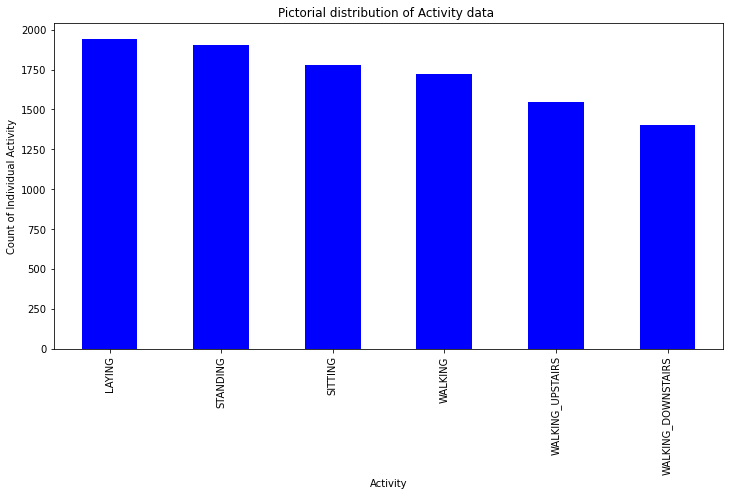

In [ ]:
print('Distribution of health monitoring device data of each Activity')
print('-----------------------------------')
print(df_sensor_activity_categorical['Activity'].value_counts())
plt.rcParams['figure.figsize']=(12,6)
df_sensor_activity_categorical['Activity'].value_counts().plot(kind='bar',color='b')
plt.title('Pictorial distribution of Activity data ')
plt.xlabel('Activity')
plt.ylabel('Count of Individual Activity')
plt.show()

#### Top three activities are Laying, Standing & SItting whose values are collected in this dataset

univariate analysis of Data
-----------------------------------


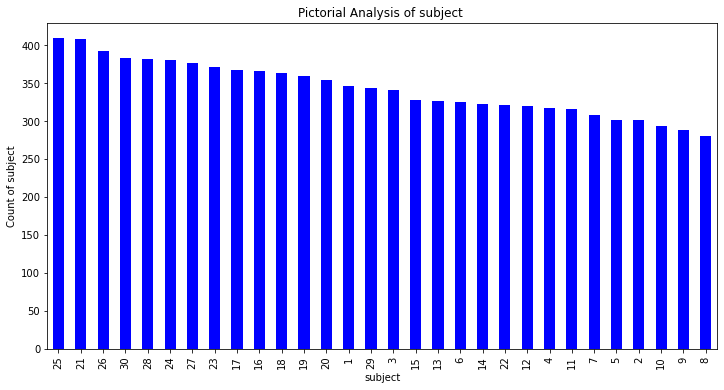

In [ ]:
print('univariate analysis of Data')
print('-----------------------------------')
#print(df_sensor_activity_categorical['subject'].value_counts())
plt.rcParams['figure.figsize']=(12,6)
df_sensor_activity_categorical['subject'].value_counts().plot(kind='bar',color='b')
plt.title('Pictorial Analysis of subject ')
plt.xlabel('subject')
plt.ylabel('Count of subject')
plt.show()

In [ ]:
df_sensor_activity.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'Data'],
      dtype='object', length=564)

### Number of Activities recorded for each subject

<AxesSubplot:title={'center':'Activities recorded for each subject'}>

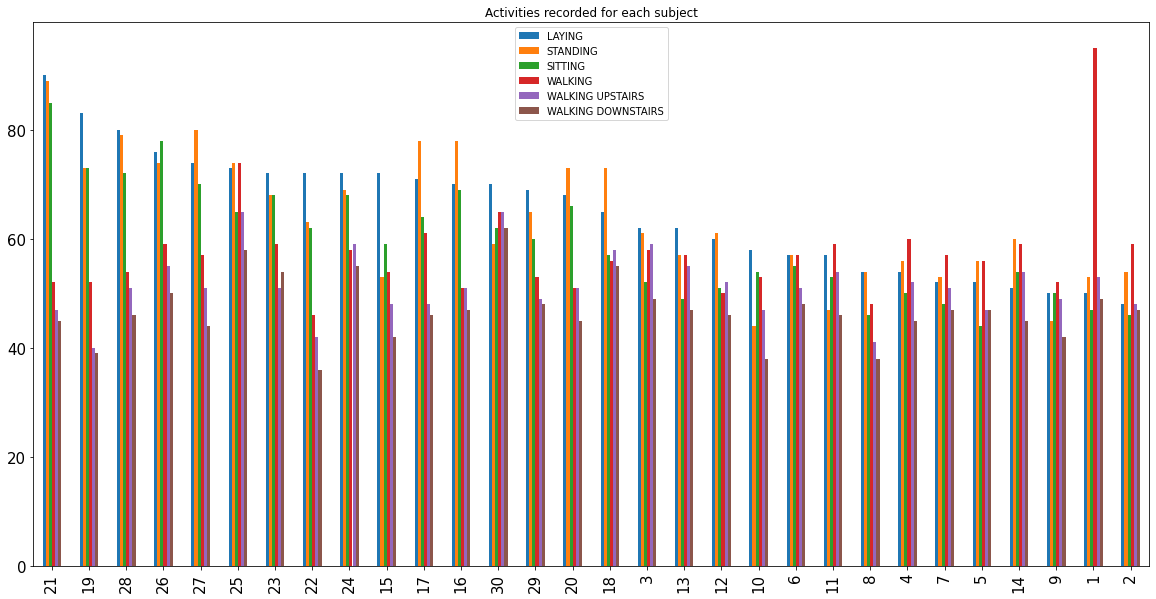

In [ ]:

bank_job_ind=pd.DataFrame()
bank_job_ind['LAYING']=df_sensor_activity_categorical[df_sensor_activity_categorical['Activity']=='LAYING']['subject'].value_counts()
bank_job_ind['STANDING']=df_sensor_activity_categorical[df_sensor_activity_categorical['Activity']=='STANDING']['subject'].value_counts()
bank_job_ind['SITTING']=df_sensor_activity_categorical[df_sensor_activity_categorical['Activity']=='SITTING']['subject'].value_counts()
bank_job_ind['WALKING']=df_sensor_activity_categorical[df_sensor_activity_categorical['Activity']=='WALKING']['subject'].value_counts()
bank_job_ind['WALKING UPSTAIRS']=df_sensor_activity_categorical[df_sensor_activity_categorical['Activity']=='WALKING_UPSTAIRS']['subject'].value_counts()
bank_job_ind['WALKING DOWNSTAIRS']=df_sensor_activity_categorical[df_sensor_activity_categorical['Activity']=='WALKING_DOWNSTAIRS']['subject'].value_counts()

bank_job_ind.plot(kind='bar',title='Activities recorded for each subject',fontsize=15, figsize=(20, 10))

#### Train and Test data are combined in one dataset

#### For all practical purpose we will focus on walking related activities which are good for healthy body & mind

In [ ]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] 
                                for col in df_sensor_activity_numerical.columns]), 
                       orient = 'index').rename(columns = {0:'count'}).sort_values('count',ascending=False)

,count
fBodyGyro,79
fBodyAcc,79
fBodyAccJerk,79
tBodyAcc,40
tBodyAccJerk,40
tBodyGyro,40
tBodyGyroJerk,40
tGravityAcc,40
fBodyBodyGyroJerkMag,13
fBodyBodyGyroMag,13


In [ ]:
label_counts = label.value_counts()
print(label_counts)


LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64


In [ ]:
#Store the data
data = []
#Iterate over each activity
for activity in label_counts.index:
    #Create dataset
    act_data = df_sensor_activity[label==activity].copy()
    act_data_data = act_data.pop('Data')
    act_subject_data = act_data.pop('subject')

In [ ]:
print(act_subject_data)
print(act_data_data)

125       1
126       1
127       1
128       1
129       1
         ..
10284    24
10285    24
10286    24
10287    24
10288    24
Name: subject, Length: 1406, dtype: object
125      Train
126      Train
127      Train
128      Train
129      Train
         ...  
10284     Test
10285     Test
10286     Test
10287     Test
10288     Test
Name: Data, Length: 1406, dtype: object


In [ ]:
# plt.figure(figsize=(30,20))
# s=1
# for p in numerical_columns:
#     plt.subplot(4,3,s)
#     sns.distplot(df_sensor_activity_numerical[p])
#     s+=1

#### Defining label variable = Activity for processing the rest of the data

In [ ]:
label = df_sensor_activity.pop('Activity')

In [ ]:
label

0                STANDING
1                STANDING
2                STANDING
3                STANDING
4                STANDING
               ...       
10294    WALKING_UPSTAIRS
10295    WALKING_UPSTAIRS
10296    WALKING_UPSTAIRS
10297    WALKING_UPSTAIRS
10298    WALKING_UPSTAIRS
Name: Activity, Length: 10299, dtype: object

### Creating duration dataframe

In [ ]:
#Create duration dataframe
duration_df = (df_sensor_activity.groupby([label,subject_data])['Data'].count().reset_index().groupby('Activity').agg({'Data':'mean'})*1.28).rename(columns = {'Data':'Seconds'})
activity_df = pd.DataFrame(data, columns=['Activity']).set_index('Activity')
activity_df.join(duration_df)
duration_df.shape

(1, 1)

### Sensor Importance For Classifying Participants by Walking Style 

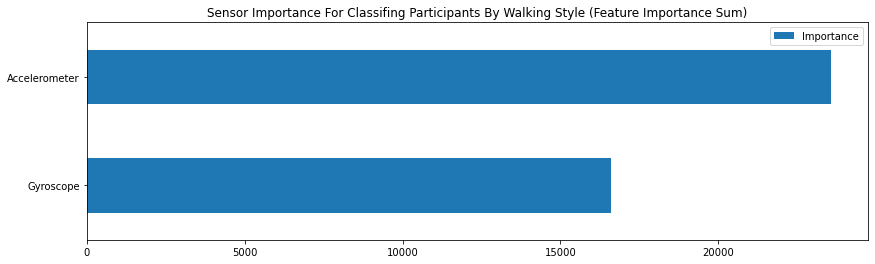

In [ ]:
# Create dataset
tsne_data = df_sensor_activity[label=='WALKING'].copy()
data_data = tsne_data.pop('Data')
subject_data = tsne_data.pop('subject')

# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# Split training testing data
enc = LabelEncoder()
label_encoded = enc.fit_transform(subject_data)
X_train, X_test, y_train, y_test = train_test_split(tsne_data, label_encoded, random_state=3)


# Create model
lgbm = LGBMClassifier(n_estimators=500, random_state=3)
lgbm = lgbm.fit(X_train, y_train)

# Get importances
features = tt_df.drop(['Data', 'subject'], axis=1).columns
importances = lgbm.feature_importances_

# Sum importances
data = {'Gyroscope':0, 'Accelerometer':0}
for importance, feature in zip(importances, features):
    if 'Gyro' in feature:
        data['Gyroscope'] += importance
    if 'Acc' in feature:
        data['Accelerometer'] += importance
        
# Create dataframe and plot
sensor_df = pd.DataFrame.from_dict(data, orient='index').rename(columns={0:'Importance'})
sensor_df.plot(kind='barh', figsize=(14,4), title='Sensor Importance For Classifing Participants By Walking Style (Feature Importance Sum)')
plt.show()